<a href="https://colab.research.google.com/github/hortenciadiniz/FFT/blob/main/FFT_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fft_dit(x):
    N = len(x)

    # Verifica se N é igual a 1 (caso base da recursão)
    if N == 1:
        return x

    # Preenche x com zeros para tornar seu tamanho uma potência de 2
    next_pow_of_2 = int(2 ** np.ceil(np.log2(N)))
    x = np.pad(x, (0, next_pow_of_2 - N), 'constant')

    N = len(x)  # Atualiza o tamanho de N após o preenchimento

    # Inicializa as listas para as sequências pares e ímpares
    x_even = []
    x_odd = []

    for i in range(N):
        if i % 2 == 0:
            x_even.append(x[i])
        else:
            x_odd.append(x[i])

    # Recursivamente calcular a FFT das sequências pares e ímpares
    X_even = fft_dit(np.array(x_even))
    X_odd = fft_dit(np.array(x_odd))

    # Calcula os fatores de rotação W
    W = np.exp(-2j * np.pi / N * np.arange(N // 2))

    # Inicializa o vetor de saída X
    X = np.zeros(N, dtype=np.complex128)

    for i in range(N // 2):
        X[i] = X_even[i] + W[i] * X_odd[i]
        X[i + N // 2] = X_even[i] - W[i] * X_odd[i]

    return X

In [3]:
frequencia1 = 1000  # Frequência da primeira senoide (em Hz)
frequencia2 = 2000  # Frequência da segunda senoide (em Hz)
amplitude1 = 1.0  # Amplitude da primeira senoide
amplitude2 = 0.6  # Amplitude da segunda senoide
duracao = 1.0  # Duração do sinal (em segundos)
taxa_amostragem = 8000  # Taxa de amostragem (em Hz)

# Crie um vetor de tempo de 0 a duracao com passos de 1/taxa_amostragem
tempo = np.arange(0, duracao, 1.0 / taxa_amostragem)

# Gere as senoides com as frequências e amplitudes especificadas
sinal1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * tempo)
sinal2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * tempo)

# Some as senoides para criar o sinal final
sinal_final = sinal1 + sinal2

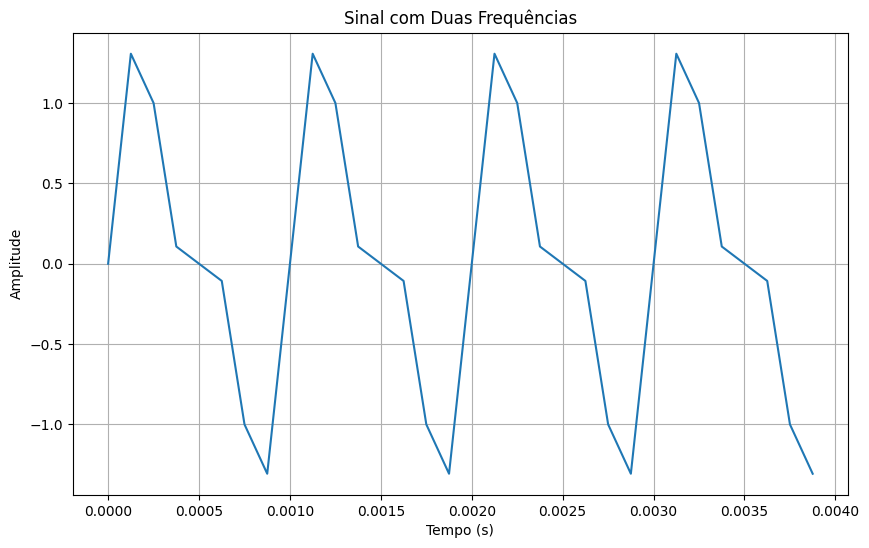

In [4]:
# Plote o sinal original
plt.figure(figsize=(10, 6))
plt.plot(tempo[:int(taxa_amostragem*0.004)], sinal_final[:int(taxa_amostragem*0.004)])
plt.title('Sinal com Duas Frequências')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
# Calcula a FFT do sinal composto
X = fft_dit(sinal_final)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


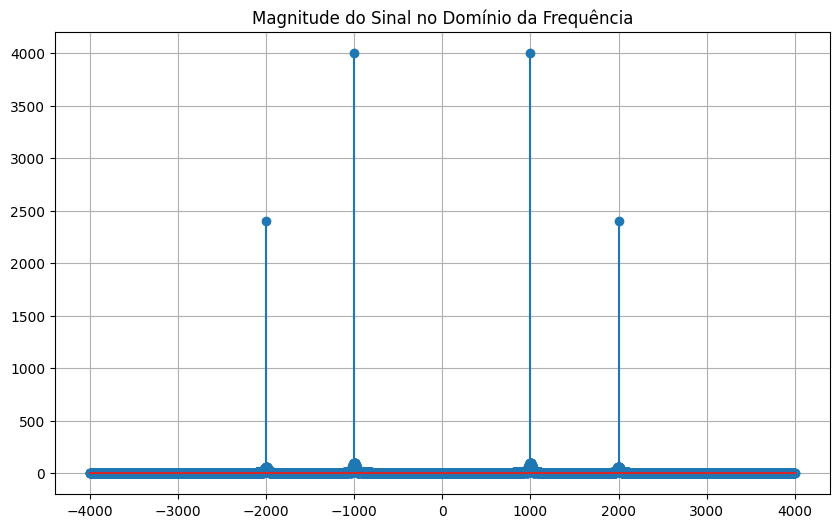

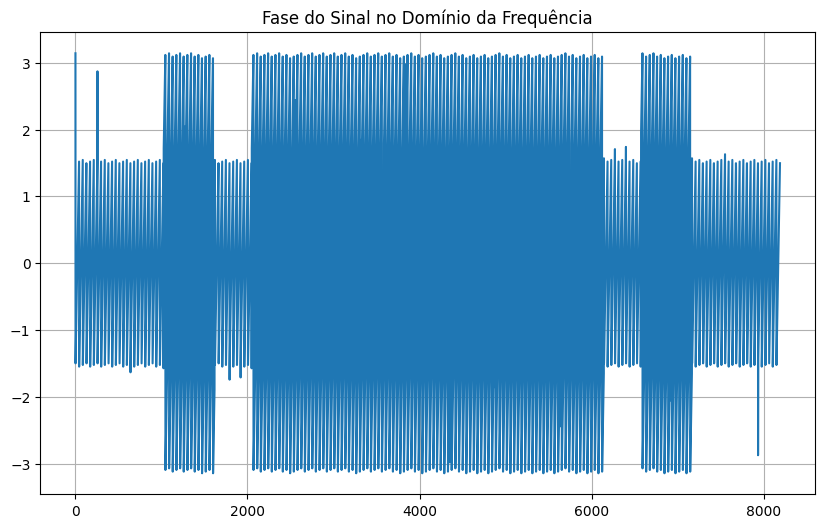

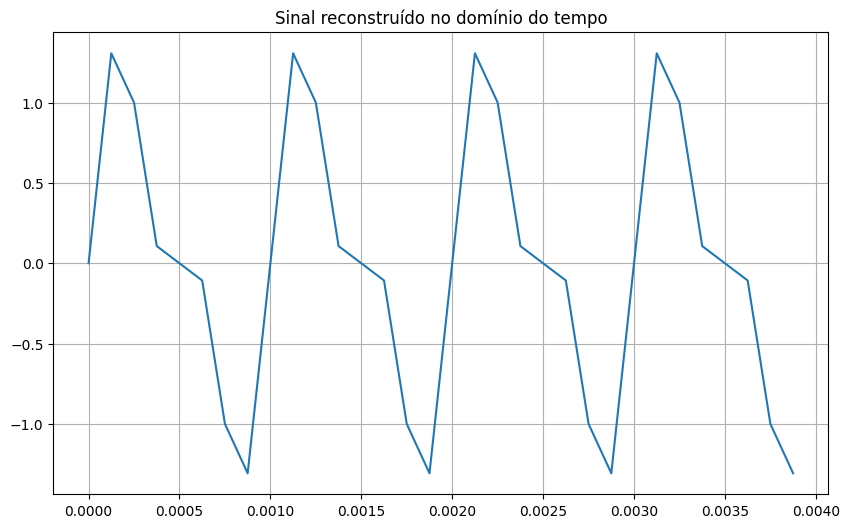

In [6]:
# Cria os vetores de frequência para os gráficos
freq_X = np.fft.fftfreq(len(X), 1/taxa_amostragem)

# Calcula a IFFT para reconstruir o sinal no domínio do tempo
x_reconstructed = np.fft.ifft(X)

# Plota a magnitude do sinal no domínio da frequência
plt.figure(figsize=(10, 6))
plt.title('Magnitude do Sinal no Domínio da Frequência')
plt.stem(freq_X, np.abs(X))
plt.grid(True)

# Plota a fase do sinal no domínio da frequência
plt.figure(figsize=(10, 6))
plt.title('Fase do Sinal no Domínio da Frequência')
plt.plot(np.angle(X))
plt.grid(True)

# Calcula a IFFT para reconstruir o sinal no domínio do tempo
plt.figure(figsize=(10, 6))
plt.title('Sinal reconstruído no domínio do tempo')
plt.plot(tempo[:int(taxa_amostragem*0.004)], x_reconstructed[:int(taxa_amostragem*0.004)])
plt.grid(True)

plt.show()